In [1]:
import igraph as ig
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw

from tqdm import trange, tqdm

from collections import defaultdict, Counter
from itertools import combinations

In [2]:
def read_snap(edge_file, com_file, prefix=""):
    edges = pd.read_csv(prefix+edge_file, sep='\t', comment="#")
    coms = []
    with open(prefix+com_file, "r") as infile:
        for line in infile:
            x = line[:-1]  # drop trailing newline
            x = x.split('\t')
            coms.append(frozenset([int(y) for y in x])) ## map to 0-based

    g = ig.Graph.DataFrame(edges, directed=False)

    c = [set() for _ in range(g.vcount())]
    for i, com in enumerate(coms):
        for v in com:
            c[v].add(i)
    c = [frozenset(i) for i in c] 
    g.vs["comms"] = c

    # Vertex list is not continugous, drop degree 0 vertices
    g = g.subgraph(np.arange(g.vcount())[np.array(g.degree()) > 0])  

    # Drop some vars to free up memory
    del edges

    return g, c


def read_abcdoo_coms(com_file, prefix=""):
    ## read communities
    file = prefix+com_file
    c = []
    with open(file, "r") as infile:
        for line in infile:
            x = line.split('\t')
            c.append(frozenset([int(y)-1 for y in x[1].rstrip()[1:-1].split(',')])) ## map to 0-based

    return c

In [3]:
## DBLP graph
dblp_g, dblp_coms = read_snap("com-dblp.ungraph.txt", "com-dblp.all.cmty.txt", "../../SNAP/")
abcdoo_d2_cs = read_abcdoo_coms("abcdoo_dblp_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_cs = read_abcdoo_coms("abcdoo_dblp_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_cs = read_abcdoo_coms("abcdoo_dblp_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")
cbk_cs = read_abcdoo_coms("dblp_cbk.dat", "../")

dblp_cs = dblp_g.vs["comms"]
print(f"DBLP has {dblp_g.vcount()} vertices.")
print(f"DBLP has {dblp_g.ecount()} edges.")
print(f"DBLP has {len(dblp_coms)} communities.")

DBLP has 317080 vertices.
DBLP has 1049865 edges.
DBLP has 425957 communities.


Values less than or equal to 0 in data. Throwing out 0 or negative values


DBLP

gamma: 2.6010423529420046
l': 2.0
KS statistic: 0.09781105075236318
D=2

gamma: 3.5227113223928948
l': 2.0
KS statistic: 0.2823773514242014
D=5

gamma: 3.7397758226934616
l': 2.0
KS statistic: 0.31461171993115017
D=10

gamma: 3.2377014100987567
l': 2.0
KS statistic: 0.18668011045651878
CBK

gamma: 2.5659527404807667
l': 2.0
KS statistic: 0.06649655729477988


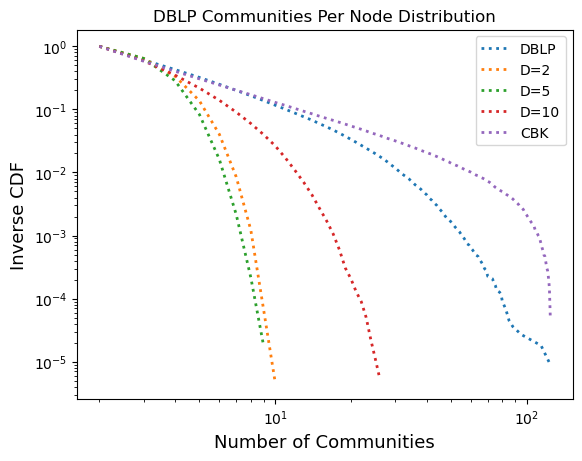

In [5]:
fig, ax = plt.subplots()

options = [dblp_cs, abcdoo_d2_cs, abcdoo_d5_cs, abcdoo_d10_cs, cbk_cs]
names = ["DBLP", "D=2", "D=5", "D=10", "CBK"]
for cs, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in cs], xmin=2)
    #X.power_law.plot_ccdf(ax=ax, color=color, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

    print(name)
    print("\ngamma:", X.power_law.alpha)
    print("l':", X.power_law.xmin)
    print("KS statistic:", X.power_law.D)

ax.set_title("DBLP Communities Per Node Distribution")
ax.legend()
ax.set_xlabel("Number of Communities", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);

In [6]:
## Amazon graph
amazon_g, amazon_coms = read_snap("com-amazon.ungraph.txt", "com-amazon.all.dedup.cmty.txt", "../../SNAP/")
abcdoo_d2_cs = read_abcdoo_coms("abcdoo_amazon_d2_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_cs = read_abcdoo_coms("abcdoo_amazon_d5_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_cs = read_abcdoo_coms("abcdoo_amazon_d10_com_only.dat", "../../ABCDGraphGenerator.jl/utils/")
cbk_cs = read_abcdoo_coms("amazon_cbk.dat", "../")

amazon_cs = amazon_g.vs["comms"]
print(f"Amazon has {amazon_g.vcount()} vertices.")
print(f"Amazon has {amazon_g.ecount()} edges.")
print(f"Amazon has {len(amazon_coms)} communities.")

Amazon has 334863 vertices.
Amazon has 925871 edges.
Amazon has 548552 communities.


Values less than or equal to 0 in data. Throwing out 0 or negative values


Amazon

gamma: 1.878245198480439
l': 2.0
KS statistic: 0.28988041205562376
D=2

gamma: 1.8430619173454934
l': 2.0
KS statistic: 0.31484162065784493
D=5

gamma: 1.8230559634077732
l': 2.0
KS statistic: 0.3984808839182047
D=10

gamma: 1.892017343085221
l': 2.0
KS statistic: 0.29890811278120855
CBK

gamma: 8.10832543566482
l': 2.0
KS statistic: 0.18152389502004473


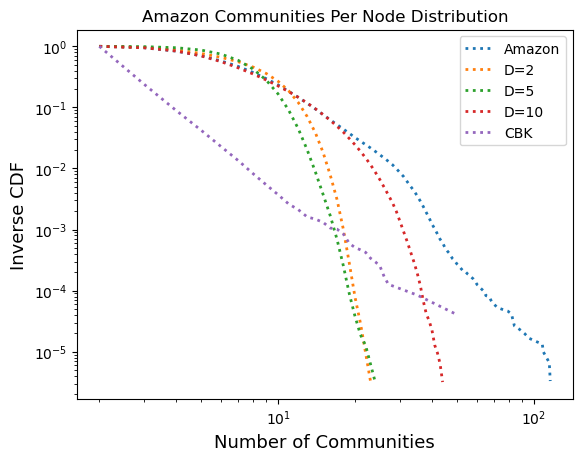

In [7]:
fig, ax = plt.subplots()

options = [amazon_cs, abcdoo_d2_cs, abcdoo_d5_cs, abcdoo_d10_cs, cbk_cs]
names = ["Amazon", "D=2", "D=5", "D=10", "CBK"]
for cs, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in cs], xmin=2)
    #X.power_law.plot_ccdf(ax=ax, color=color, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

    print(name)
    print("\ngamma:", X.power_law.alpha)
    print("l':", X.power_law.xmin)
    print("KS statistic:", X.power_law.D)

ax.set_title("Amazon Communities Per Node Distribution")
ax.legend()
ax.set_xlabel("Number of Communities", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);

Youtube has 52675 vertices.
Youtube has 318431 edges.
Youtube has 1157828 communities.
Youtube

gamma: 2.8048193155119403
l': 2.0
KS statistic: 0.09774284087530294
D=2

gamma: 4.365311258712206
l': 2.0
KS statistic: 0.3030755059184895
D=5

gamma: 4.380060158247856
l': 2.0
KS statistic: 0.30162476685634854
D=10

gamma: 3.5735172780412543
l': 2.0
KS statistic: 0.1889108656889647
CBK

gamma: 2.546218858842609
l': 2.0
KS statistic: 0.060372540083616144


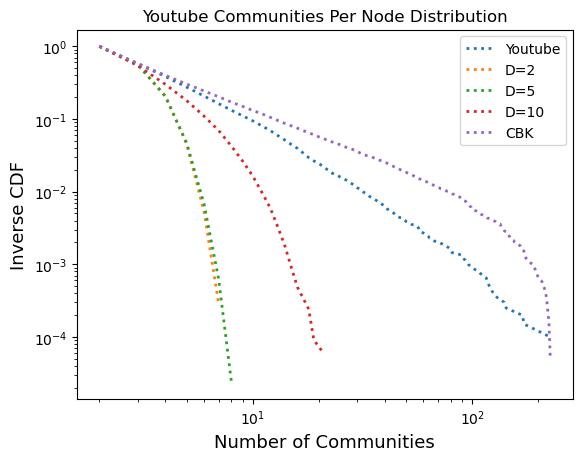

In [16]:
youtube_g, youtube_coms = read_snap("com-youtube.ungraph.txt", "com-youtube.all.cmty.txt", "../../SNAP/")
# Drop outliers
is_outlier = np.array([len(comms) == 0 for comms in youtube_g.vs["comms"]])
youtube_g = youtube_g.subgraph(np.argwhere(~is_outlier).reshape(-1))
abcdoo_d2_cs = read_abcdoo_coms("abcdoo_youtube_nooutliers_d2_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d5_cs = read_abcdoo_coms("abcdoo_youtube_nooutliers_d5_com.dat", "../../ABCDGraphGenerator.jl/utils/")
abcdoo_d10_cs = read_abcdoo_coms("abcdoo_youtube_nooutliers_d10_com.dat", "../../ABCDGraphGenerator.jl/utils/")
cbk_cs = read_abcdoo_coms("youtube_cbk.dat", "../")

youtube_cs = youtube_g.vs["comms"]
print(f"Youtube has {youtube_g.vcount()} vertices.")
print(f"Youtube has {youtube_g.ecount()} edges.")
print(f"Youtube has {len(youtube_coms)} communities.")

fig, ax = plt.subplots()

options = [youtube_cs, abcdoo_d2_cs, abcdoo_d5_cs, abcdoo_d10_cs, cbk_cs]
names = ["Youtube", "D=2", "D=5", "D=10", "CBK"]
for cs, name in zip(options, names):
    X = powerlaw.Fit([len(x) for x in cs], xmin=2)
    #X.power_law.plot_ccdf(ax=ax, color=color, linestyle="-", label=name)
    X.plot_ccdf(ax=ax, linewidth=2, original_data=False, linestyle=":", label=name)

    print(name)
    print("\ngamma:", X.power_law.alpha)
    print("l':", X.power_law.xmin)
    print("KS statistic:", X.power_law.D)

ax.set_title("Youtube Communities Per Node Distribution")
ax.legend()
ax.set_xlabel("Number of Communities", fontsize=13)
ax.set_ylabel("Inverse CDF", fontsize=13);